In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./df.csv')

### A Little More Cleanup

In [4]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'medIncome', 'popEst2015',
       'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'Geography', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [5]:
df.dtypes

avgAnnCount               float64
avgDeathsPerYear            int64
medIncome                   int64
popEst2015                  int64
povertyPercent            float64
studyPerCap               float64
binnedInc                  object
MedianAge                 float64
MedianAgeMale             float64
MedianAgeFemale           float64
Geography                  object
AvgHouseholdSize          float64
PercentMarried            float64
PctNoHS18_24              float64
PctHS18_24                float64
PctBachDeg18_24           float64
PctHS25_Over              float64
PctBachDeg25_Over         float64
PctEmployed16_Over        float64
PctUnemployed16_Over      float64
PctPrivateCoverage        float64
PctEmpPrivCoverage        float64
PctPublicCoverage         float64
PctPublicCoverageAlone    float64
PctWhite                  float64
PctBlack                  float64
PctAsian                  float64
PctOtherRace              float64
PctMarriedHouseholds      float64
BirthRate     

In [13]:
df['binnedInc'] = df['binnedInc'].str.replace(']',')')

C:\Users\SReed\AppData\Local\Temp/ipykernel_21200/1215154272.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['binnedInc'] = df['binnedInc'].str.replace(']',')')


In [15]:
df['binnedInc'] = df['binnedInc'].str.replace('[','(')

C:\Users\SReed\AppData\Local\Temp/ipykernel_21200/1143044809.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['binnedInc'] = df['binnedInc'].str.replace('[','(')


In [14]:
df['binnedInc'][0]

'(61494.5, 125635)'

In [8]:
df['binnedInc'].unique()

array(['(61494.5, 125635)', '(48021.6, 51046.4)', '(42724.4, 45201)',
       '(51046.4, 54545.6)', '(37413.8, 40362.7)', '(40362.7, 42724.4)',
       '(54545.6, 61494.5)', '(34218.1, 37413.8)', '(22640, 34218.1)',
       '(45201, 48021.6)'], dtype=object)

We can see above that almost all the columns are numeric, which will save us having to make dummy variables for model training. There are two non-numeric categories. The first is Geography. This is the name of the county, which will become our index. 

The second is binnedInc. This is the median income of the county, binned into 10 evenly split bins. The value of this column is the range of the bin that the county falls into. The format was inconsistent with some straight and some curly brackets. I stardardized the bracket format but the question remains what to do with this object data type.

This grouping would be interesting for economic analyses. However, in this case we already have the median income of each county. Binning them is just going to be another representation of that same statistic but with less granularity. Therefore, I will drop the column.

In [22]:
df.drop(columns = ['binnedInc'], inplace = True)

In [23]:
#set the name of the county as our index
df.set_index('Geography', inplace = True)

### Initial EDA

I want to start to get an idea of how some of the variables relate to the target value of avgAnnCount. Below I've grabbed a handful so as not to get too overwhelmed with plots.

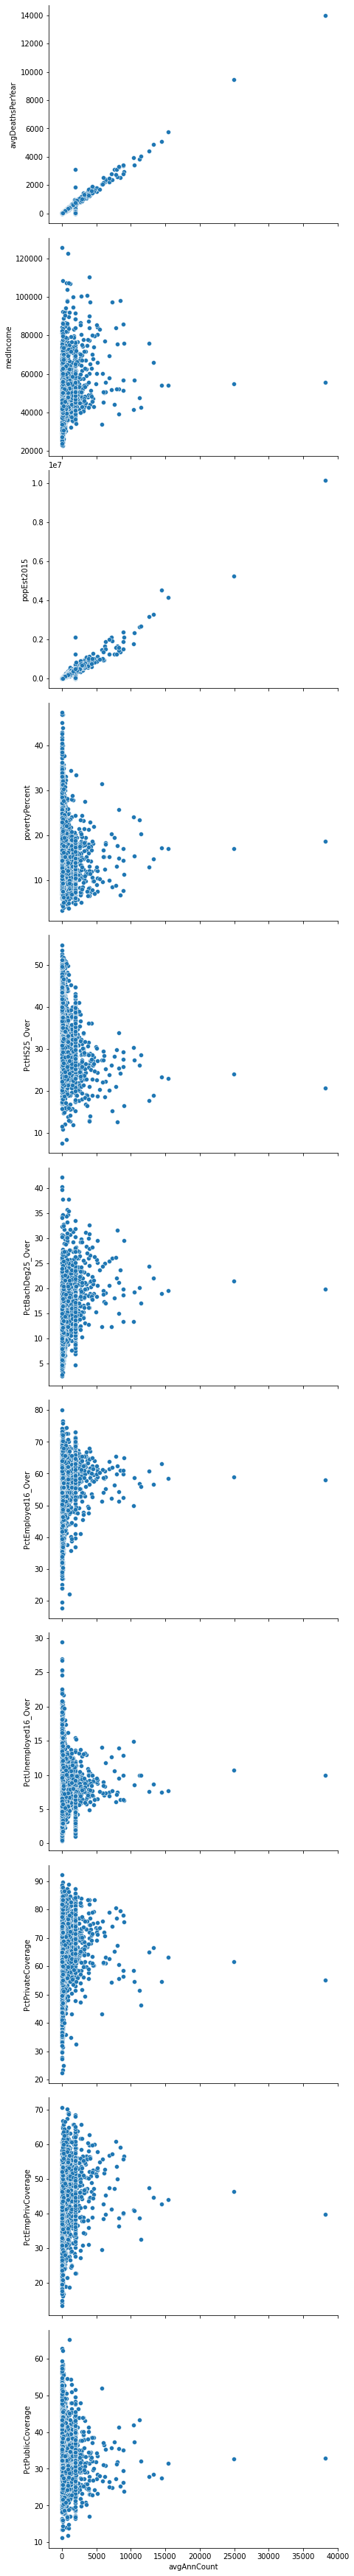

In [36]:
#create some pairplots to start to vizualize
sns.pairplot(data=df,
                  x_vars=['avgAnnCount'],
                  y_vars=['avgDeathsPerYear', 'medIncome', 'popEst2015',
       'povertyPercent','PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage'],
                   height = 4.5,
                   aspect = 1.5)
plt.show()

A couple things jump out. At first galce there appears to be an obvious outlier. From the extraction below we can see that it is Los Angeles County. However, when we look at where it lies on some of the plots it doesn't seem to be an outlier in the sense of outside what we would expect. For example, it has far more cancer diagnoses, but it's population is also far greater than any other county. Additionally, it lies pretty close to the middle of the other distributions such as economic variables and health coverage. Therefore, it would be a mistake to discard this data point because as we scale the model up and down for, say, states or cities, we want our model to be able to accomodate fluxuations in size.

I am also interested in the disparities of the health coverage related graphs. The next steps are to do direct comparison of these graphs, as well as comparing racial differences.

Lastly, I am interested in seeing a regression line of the population plot and examining how far some of the points fall from that line.

In [39]:
df['avgAnnCount'].max()

38150.0

In [40]:
#extract column with highest avgAnnCount
df[df['avgAnnCount'] == 38150.0]

,avgAnnCount,avgDeathsPerYear,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
Geography,,,,,,,,,,,,,,,,,,,,,
"Los Angeles County, California",38150.0,14010,55686,10170292,18.7,255.941521,35.6,34.4,36.8,3.02,...,55.0,39.7,32.9,23.0,53.25871,8.27614,14.12938,19.591522,44.58165,4.705281


### Breakdown by Race and Health Coverage

I've created a couple graphics that show the average annual count in comparison to breakdowns of the population by race and heatlh coverage.

Ultimately, without more concrete information about how many of the diagnoses ACTUALLY can be attributed to people of each race and/or health coverage, there is nothing particularly useful here.

I have left them as a collapse-able section because if more specific statistics were gathered, these graphs serve as a way to start thinking about how to compare our statistics to what we might expect if all other things we equal. 

As an example to make this more concrete, at the end I have included regression lines showing the increases we would expect in cancer diagnoses by race as the population increased (assuming our overall racial demographics remained stable). If public health officials were monitoring for racial disparities and started seeing diagnoses outside of these expectations, it might serve as a potential red flag.

<AxesSubplot:xlabel='Percentage By Insurance', ylabel='avgAnnCount'>

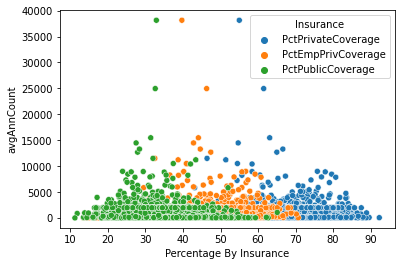

In [192]:
dfm = df.melt(id_vars= ['avgAnnCount'], value_vars=['PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage'], var_name='Insurance', value_name= 'Percentage By Insurance')
sns.scatterplot(y = 'avgAnnCount' , x = 'Percentage By Insurance' , data = dfm, hue = 'Insurance'  )


<AxesSubplot:xlabel='Percentage By Race', ylabel='avgAnnCount'>

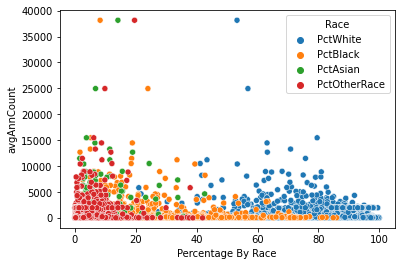

In [53]:
dfm = df.melt(id_vars= ['avgAnnCount'], value_vars=['PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace'], var_name='Race', value_name= 'Percentage By Race')
sns.scatterplot(y = 'avgAnnCount' , x = 'Percentage By Race' , data = dfm, hue = 'Race'  )

In [110]:
df['pop_black'] = (df['popEst2015'] * df['PctBlack']).round()
df['pop_white'] = (df['popEst2015'] * df['PctWhite']).round()
df['pop_asian'] = (df['popEst2015'] * df['PctAsian']).round()
df['pop_other_race'] = (df['popEst2015'] * df['PctOtherRace']).round()

In [183]:
df['projected_black_avgAnnCount'] = (df['avgAnnCount'] * (df['PctBlack']/100)).round()
df['projected_white_avgAnnCount'] = (df['avgAnnCount'] * (df['PctWhite']/100)).round()
df['projected_asian_avgAnnCount'] = (df['avgAnnCount'] * (df['PctAsian']/100)).round()
df['projected_other_race_avgAnnCount'] = (df['avgAnnCount'] * (df['PctOtherRace']/100)).round()

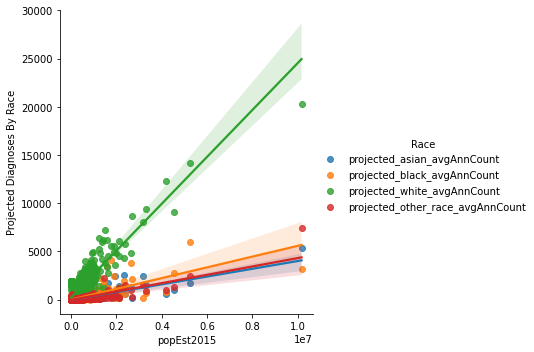

In [191]:
dfm = df.melt(id_vars= ['popEst2015'], value_vars=['projected_asian_avgAnnCount', 'projected_black_avgAnnCount','projected_white_avgAnnCount', 'projected_other_race_avgAnnCount'], var_name='Race', value_name= 'Projected Diagnoses By Race')
sns.lmplot(x= 'popEst2015',  y = 'Projected Diagnoses By Race' , data = dfm, hue = 'Race' )

### Exploring Low Values

One additional thing that stuck out in our pairplots was that there are many values near 0. I want to confirm that we don't have counties reporting 0 annual cancer counts, which might indicate missing data/poor data quality.

In [84]:
#get an idea of the lower limits of our data
low_rate = df[df['avgAnnCount'] < 9]
low_rate

,avgAnnCount,avgDeathsPerYear,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,...,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,pop_black,pop_white,pop_asian,pop_other_race
Geography,,,,,,,,,,,,,,,,,,,,,
"Wibaux County, Montana",6.0,3,43859,1130,11.7,0.0,51.2,53.0,49.6,2.15,...,100.000000,0.000000,0.000000,0.000000,51.785714,17.877095,0.0,113000.0,0.0,0.0
"Dolores County, Colorado",7.0,4,44235,1978,15.4,0.0,39.9,37.6,48.6,2.64,...,96.186896,0.000000,0.000000,0.107411,50.566572,2.105263,0.0,190258.0,0.0,212.0
"Kiowa County, Colorado",8.0,5,42310,1423,13.5,0.0,41.2,41.4,40.9,2.45,...,93.779904,0.820232,0.068353,0.000000,54.888508,3.095975,1167.0,133449.0,97.0,0.0
"Issaquena County, Mississippi",7.0,4,37096,1337,39.5,0.0,44.3,44.5,43.7,2.33,...,34.314485,65.143300,0.000000,0.542215,38.761468,5.232558,87097.0,45878.0,0.0,725.0
"Edwards County, Texas",8.0,4,35554,1894,22.5,0.0,49.5,50.7,49.1,2.54,...,97.586569,0.157398,0.000000,2.203568,53.547523,1.580135,298.0,184829.0,0.0,4174.0
"Hudspeth County, Texas",8.0,4,32086,3379,26.7,0.0,39.6,40.4,36.8,3.06,...,90.690691,1.261261,0.780781,5.405405,53.822314,8.859060,4262.0,306444.0,2638.0,18265.0
"Golden Valley County, Montana",7.0,3,37316,827,20.1,0.0,53.1,53.3,50.9,2.29,...,96.825397,0.000000,0.000000,0.000000,57.500000,1.481481,0.0,80075.0,0.0,0.0
"Aleutians West Census Area, Alaska",8.0,3,68387,5702,9.9,0.0,36.8,38.8,32.9,3.59,...,31.562280,4.732583,37.156932,5.295567,42.882250,4.391052,26985.0,179968.0,211869.0,30195.0
"Sully County, South Dakota",8.0,4,59879,1426,6.3,0.0,44.6,44.0,46.1,2.34,...,98.025868,0.000000,0.000000,0.000000,55.466238,13.620072,0.0,139785.0,0.0,0.0


Confirmed that there are no counties posting 0 cancer diagnoses,. We have sparcely populated counties with numbers as low as 6 but no counties with a value of 0.

### Correlation Heatmap

In [99]:
#Reduce dimensionality to make heatmap visualiztion more interpretable
small_corr_df = df[['avgAnnCount','medIncome','popEst2015','povertyPercent','MedianAge','PctNoHS18_24','PctBachDeg25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPublicCoverage']]

<AxesSubplot:>

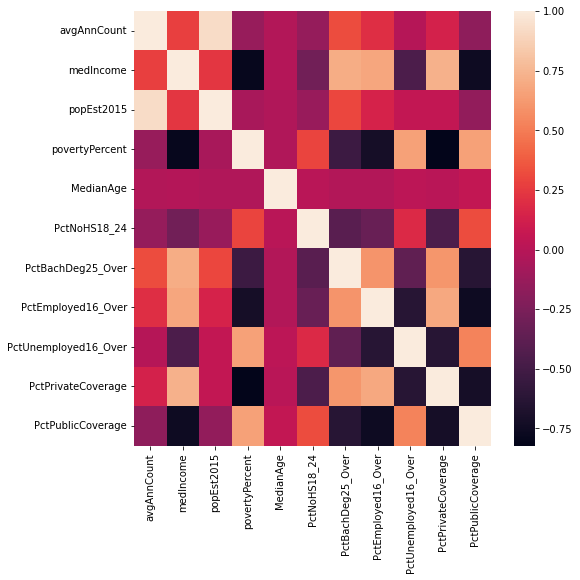

In [102]:
#Correlation heatmap
ax = plt.subplots(figsize= (8, 8)) 
sns.heatmap(small_corr_df.corr())

Not surpisingly we see relationships between education, economic variables, and health. Higher education levels are correlated with higher median incomes and more private health insurance.

In turn, there are correlations between these factors and the average annual count of cancer diagnoses that are likely downstream affects. We need to be careful about making causal inferences from correlations in our data. However, as a first hypothesis one could imagine that those with higher education levels, income, and better insurance plans are 1. more likely to have longer life expectancies that eventually result in cancer diagnoses. And 2. more likely to seek medical treatment when they have health issues. 

### Count of Population vs Diagnoses

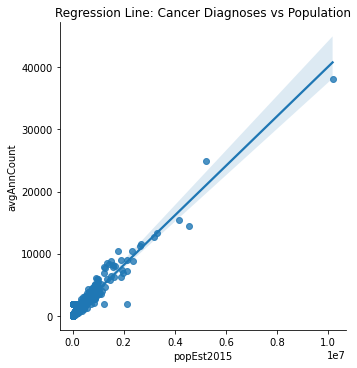

In [186]:
sns.lmplot(x = 'popEst2015', y = 'avgAnnCount', data = df, ci = 99).set(title = 'Regression Line: Cancer Diagnoses vs Population')

If all other things were equal, we would expect our regression line with a 99% confidence interval to capture our data points as we scale up for population. We can see that population alone does not explain our variance. We will see whether our model will use other factors and make sense of more of our data points.